In [ ]:
#Preparo il db dei tweet
#Creo un nuovo df filtrato per stock_name contenente il sentiment

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()      # Inizializza il Sentiment Intensity Analyzer

df_tweet = pd.read_csv("DB_TWEET_TOTALE_RIPULITO.csv")
desired_stock_name = input("Inserisci il titolo desiderato: ")     # Stock name desiderato
                            #Sector 	            Symbol  	Company
                            #Basic Matierials	    XOM	        Exxon Mobil Corporation
                            #Consumer Goods	        AAPL	    Apple Inc.
                            #Healthcare	            JNJ	        Johnson & Johnson
                            #Services	            AMZN	    Amazon.com  Inc.
                            #Utilities	            NEE	        NextEra Energy Inc.
                            #Conglomerates	        IEP	        Icahn Enterprises L.P.
                            #Financial	            BCH	        Banco de Chile
                            #Industrial Goods	    GE	        General Electric Company
                            #Technology	            GOOG	    Alphabet Inc.


stock_tweet = []                        # Lista per memorizzare i tweet filtrati
for i, tweet in enumerate(df_tweet["text"]):
    stock_name = df_tweet["stock_name"][i]          # Stock name corrente
    tweet_date = df_tweet["date"][i]                # Data del tweet

    if stock_name == desired_stock_name and isinstance(tweet, str):
        sentiment_scores = sia.polarity_scores(tweet)   # Calcola il sentiment del tweet
        sentiment_score = sentiment_scores['compound']  # Ottieni il punteggio di sentiment

        if sentiment_score > 0:             # Determina la polarità del sentiment
            sentiment = 'Positive'
        elif sentiment_score < 0:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'

        #  Aggiungi il tweet filtrato alla lista
        stock_tweet.append({
            'stock_name': stock_name,
            'Date': tweet_date,
            'tweet': tweet,
            'Sentiment_Score': sentiment_score,
            'sentiment': sentiment
        })

df_stock_tweet = pd.DataFrame(stock_tweet)  # Crea il nuovo dataframe con i tweet filtrati
df_stock_tweet.rename(columns={'tweet_date': 'Date'}, inplace=True)  # Sostituisci con il nome corretto

print(df_stock_tweet.info())
print('duplicati:' + str(df_stock_tweet['Date'].duplicated().sum()))  # Verifica valori duplicati
print('stock_name: ' + df_stock_tweet['stock_name'].unique())
print(df_stock_tweet['sentiment'].unique())

<ipython-input-12-51c8d5c80c28>:9: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tweet = pd.read_csv("DB_TWEET_TOTALE_RIPULITO.csv")


Inserisci il titolo desiderato: AAPL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20850 entries, 0 to 20849
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stock_name       20850 non-null  object 
 1   Date             20850 non-null  object 
 2   tweet            20850 non-null  object 
 3   Sentiment_Score  20850 non-null  float64
 4   sentiment        20850 non-null  object 
dtypes: float64(1), object(4)
memory usage: 814.6+ KB
None
duplicati:20066
['stock_name: AAPL']
['Positive' 'Neutral' 'Negative']


In [ ]:
#Filtro il df delle quotazioni per stock_name

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("DB_STOCK_TOTALE.csv")            #leggi il file CSV
df.sort_values(['stock_name','Date'], inplace=True)    #ordina i dati
df_stock = df[df['stock_name'] == desired_stock_name]

print(df_stock.info())
print('duplicati:' + str(df_stock['Date'].duplicated().sum()))  # Verifica valori duplicati
print('stock_name: ' + df_stock['stock_name'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 56529 to 57786
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1258 non-null   int64  
 1   Date        1258 non-null   object 
 2   Open        1258 non-null   float64
 3   High        1258 non-null   float64
 4   Low         1258 non-null   float64
 5   Close       1258 non-null   float64
 6   Adj Close   1258 non-null   float64
 7   Volume      1258 non-null   float64
 8   stock_name  1258 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 98.3+ KB
None
duplicati:0
['stock_name: AAPL']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Normalizzare i dati che poi useremo come output per poterli confrontare

# Calcola i valori minimo e massimo della colonna di riferimento
Close_min = df_stock['Close'].min()
Close_max = df_stock['Close'].max()

# Calcola la nuova colonna utilizzando la formula
df_stock['Close_norm'] = (df_stock['Close'] - Close_min) / (Close_max - Close_min)

print(df_stock.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 56529 to 57786
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1258 non-null   int64  
 1   Date        1258 non-null   object 
 2   Open        1258 non-null   float64
 3   High        1258 non-null   float64
 4   Low         1258 non-null   float64
 5   Close       1258 non-null   float64
 6   Adj Close   1258 non-null   float64
 7   Volume      1258 non-null   float64
 8   stock_name  1258 non-null   object 
 9   Close_norm  1258 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 108.1+ KB
None


<ipython-input-18-c561dea748ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['Close_norm'] = (df_stock['Close'] - Close_min) / (Close_max - Close_min)


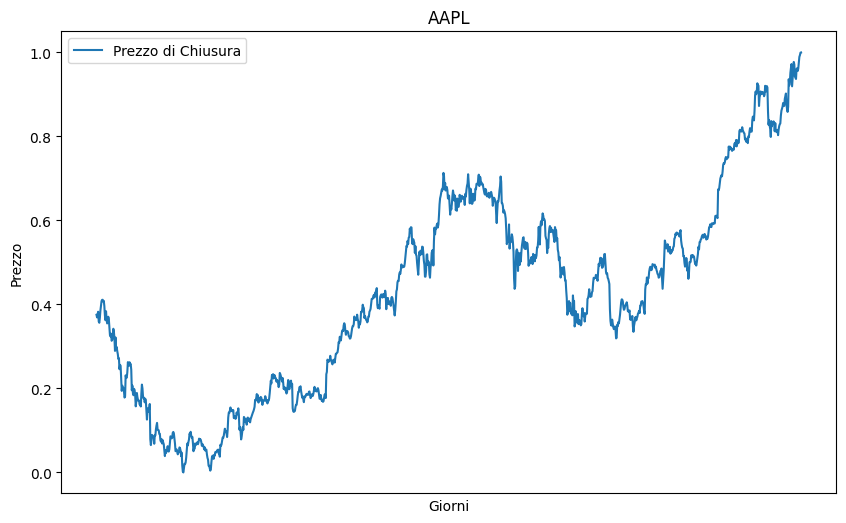

In [ ]:
#Guardo graficamente l'andamento dei prezzi del df

import matplotlib.pyplot as plt

# Crea un grafico della serie storica dei prezzi
plt.figure(figsize=(10, 6))     #creare figura dimensioni specificate. figsize dimensioni in pollici

#plot = disegnare punti in un diagramma collegati da una riga
plt.plot(df_stock['Date'], df_stock['Close_norm'], label='Prezzo di Chiusura')
plt.xlabel('Giorni')
plt.ylabel('Prezzo')
plt.title(desired_stock_name)
plt.legend()                            #aggiungere legenda
plt.xticks([])                          #imposta etichette come vuoto, quindi non verranno visualizzate
plt.show()

In [ ]:
#Preparo un df contentenente solo i sentiment_score per data

import pandas as pd
df_sentiment = df_stock_tweet.groupby(['Date', 'stock_name'])['Sentiment_Score'].sum().reset_index()
print(df_sentiment[['Date', 'stock_name', 'Sentiment_Score']])

print(df_sentiment.info())
print('duplicati:' + str(df_sentiment['Date'].duplicated().sum()))  # Verifica valori duplicati


           Date stock_name  Sentiment_Score
0    2014-01-01       AAPL           0.4175
1    2014-01-02       AAPL           6.4623
2    2014-01-03       AAPL           1.3128
3    2014-01-04       AAPL           1.1366
4    2014-01-05       AAPL           0.5781
..          ...        ...              ...
779  2016-03-27       AAPL           1.4544
780  2016-03-28       AAPL           2.7543
781  2016-03-29       AAPL           0.5773
782  2016-03-30       AAPL           4.8642
783  2016-03-31       AAPL           4.3780

[784 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             784 non-null    object 
 1   stock_name       784 non-null    object 
 2   Sentiment_Score  784 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.5+ KB
None
duplicati:0


In [ ]:
#Unisco il df delle quotazioni con quello contente il sentiment_score

import pandas as pd

# Effettua la join tra df_stock e df_stock_tweet utilizzando le colonne "Date" e "stock_name"
df_merged = pd.merge(df_stock, df_sentiment[['stock_name', 'Date', 'Sentiment_Score']], on=['stock_name', 'Date'], how='left')

df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Sentiment_Score'] = df_merged.groupby(['stock_name', 'Date'])['Sentiment_Score'].transform('sum')

df_merged.sort_values(['stock_name', 'Date'], inplace=True)  # Ordina i dati per la colonna "Date"

print(df_merged.info())
print('duplicati:' + str(df_merged['Date'].duplicated().sum()))  # Verifica valori duplicati
print('val_mancanti: ' + str(df_merged['Open'].isnull().sum()))  # Verifica valori mancanti



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1258 non-null   int64         
 1   Date             1258 non-null   datetime64[ns]
 2   Open             1258 non-null   float64       
 3   High             1258 non-null   float64       
 4   Low              1258 non-null   float64       
 5   Close            1258 non-null   float64       
 6   Adj Close        1258 non-null   float64       
 7   Volume           1258 non-null   float64       
 8   stock_name       1258 non-null   object        
 9   Close_norm       1258 non-null   float64       
 10  Sentiment_Score  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 117.9+ KB
None
duplicati:0
val_mancanti: 0


In [ ]:
# Suddivido i dati in training e test (test = 20%)

from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer

df_train, df_test = train_test_split(df_merged, test_size=0.2, shuffle=False)

# Verifica che la data minima nell'insieme di test sia successiva alla data massima nell'insieme di training
if df_test['Date'].min() <= df_train['Date'].max():
    raise ValueError("La data minima nell'insieme di test non è successiva alla data massima nell'insieme di training")

print('duplicati:' + str(df_merged['Date'].duplicated().sum()))  # Verifica valori duplicati


duplicati:0


In [ ]:
#Utilizzo un modello di regressione lineare

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Esegui lo shift delle colonne Close
df_train['Close_norm'] = df_train['Close_norm'].shift(-1)
df_test['Close_norm'] = df_test['Close_norm'].shift(-1)

# Rimuovi l'ultima riga che contiene valori NaN
df_train.dropna(subset=['Close_norm'], inplace=True)
df_test.dropna(subset=['Close_norm'], inplace=True)

# Prepara variabili input e output
x_train = df_train[['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']]
y_train = df_train['Close_norm']
x_test = df_test[['Open', 'High', 'Low', 'Volume', 'Sentiment_Score']]
y_test = df_test['Close_norm']

# Addestra il modello di regressione lineare
regression = LinearRegression()
regression.fit(x_train, y_train)

# Prevedi i valori di chiusura
y_pred = regression.predict(x_test)

# Calcola l'errore quadratico medio
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 0.00022303625935109837


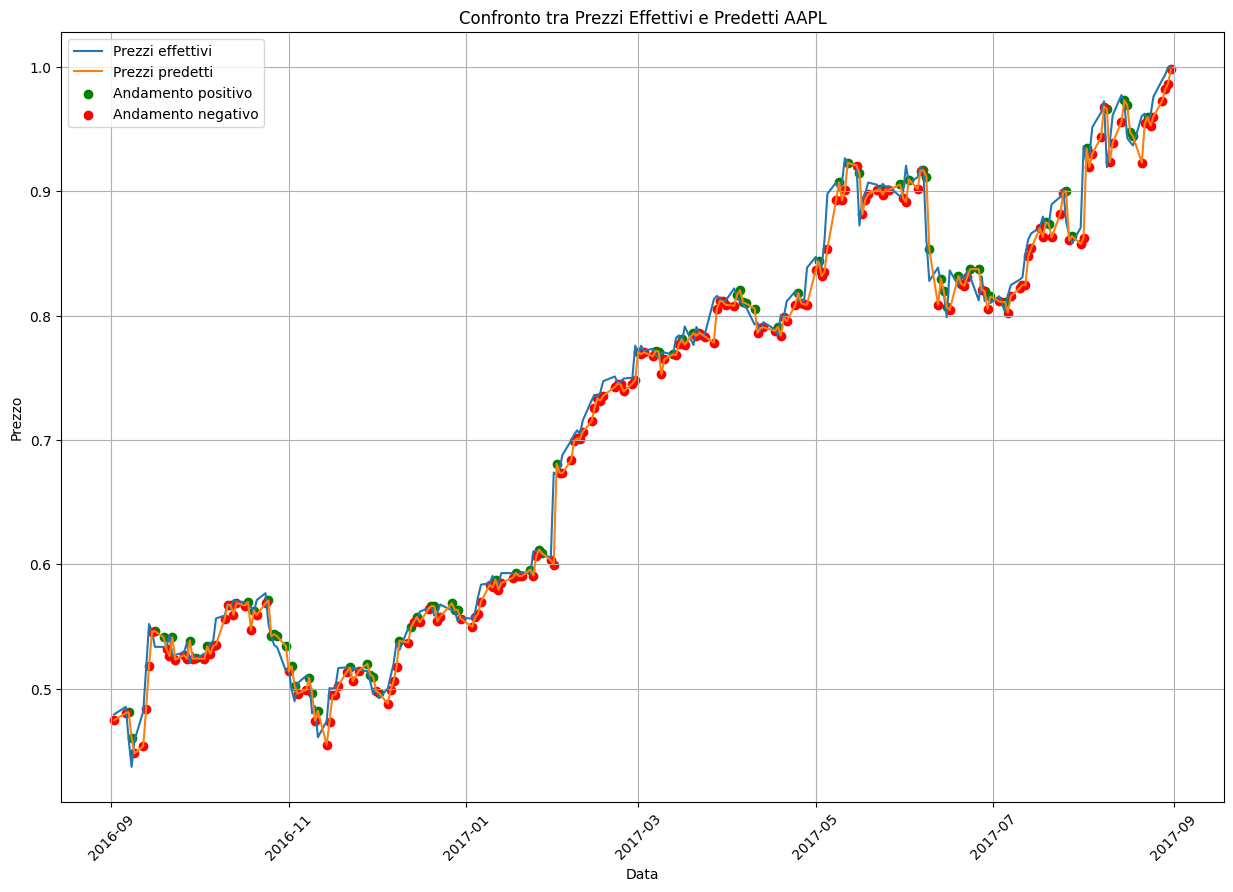

In [ ]:
# Crea il grafico
plt.figure(figsize=(15, 10))
plt.plot(df_test['Date'], y_test, label='Prezzi effettivi')
plt.plot(df_test['Date'], y_pred, label='Prezzi predetti')

# Calcola l'andamento dei prezzi predetti
price_change = y_pred - y_test

# Aggiungi punti verdi per l'andamento positivo
plt.scatter(df_test['Date'][price_change > 0], y_pred[price_change > 0], color='green', label='Andamento positivo')

# Aggiungi punti rossi per l'andamento negativo
plt.scatter(df_test['Date'][price_change < 0], y_pred[price_change < 0], color='red', label='Andamento negativo')

plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.title('Confronto tra Prezzi Effettivi e Predetti ' + desired_stock_name)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Basic Matierials	XOM	    Exxon Mobil Corporation     MSE = 0.0005048741274048334
#Consumer Goods	    AAPL	Apple Inc.                  MSE = 0.00022303625935109837
#Healthcare	        JNJ	    Johnson & Johnson           MSE = 0.00020550425887674878
#Services	        AMZN	Amazon.com  Inc.            MSE = 0.00017356990206954763
#Utilities	        NEE	    NextEra Energy Inc.         MSE = 0.00022565583981202765
#Conglomerates	    IEP	    Icahn Enterprises L.P.      MSE = 8.291904066754802e-05
#Financial	        BCH	    Banco de Chile              MSE = 0.00037204290926620476
#Industrial Goods	GE	    General Electric Company    MSE = 0.0004901901074632877
#Technology	        GOOG	Alphabet Inc.               MSE = 0.00018952104312409387


max: 7
min: 1


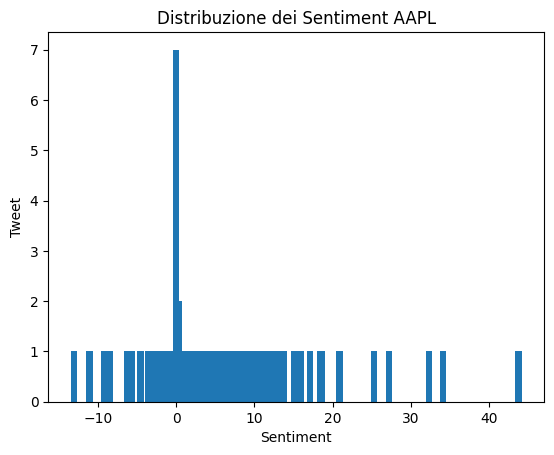

In [ ]:
# Calcola la distribuzione dei punteggi di sentiment
sentiment_counts = df_sentiment['Sentiment_Score'].value_counts()

# Visualizza i tweet in un grafico a barre
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Tweet')
plt.title('Distribuzione dei Sentiment '+desired_stock_name)

max_value = sentiment_counts.max()
min_value = sentiment_counts.min()

print("max:", max_value)
print("min:", min_value)

plt.xlim()  # Imposta i limiti dell'asse
plt.show()
